# Analiza Danych - Zadanie 9.2

1. Zależność pomiędzy tym, kto jest bezpośrednim przełożonym pracownika, a oceną wydajności pracy

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
df = pd.read_csv('HRDataset.csv')
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
5,"Smith, Leigh Ann",7.110077e+08,1.0,1.0,0.0,5.0,1.0,3.0,1.0,20.50,1.0,2.0,Administrative Assistant,MA,1844.0,06/14/87,F,Married,US Citizen,No,Asian,9/26/2011,09/25/13,career change,Voluntarily Terminated,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,3.80,4.0,4.0,NaN,NaN
6,"Bunbury, Jessica",1.504073e+09,1.0,1.0,0.0,5.0,6.0,3.0,0.0,55.00,1.0,3.0,Area Sales Manager,VA,21851.0,06/01/64,F,Married,Eligible NonCitizen,No,Black or African American,8/15/2011,08/02/14,Another position,Voluntarily Terminated,Sales,John Smith,17.0,Social Networks - Facebook Twitter etc,Fully Meets,3.14,5.0,0.0,NaN,NaN
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,0.0,3.0,Area Sales Manager,VT,5664.0,05/15/63,F,Single,US Citizen,No,White,8/18/2014,NaN,N/A - still employed,Active,Sales,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0
8,"Dietrich, Jenna",1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,0.0,3.0,Area Sales Manager,WA,98052.0,05/14/87,F,Single,US Citizen,Yes,White,2/20/2012,NaN,N/A - still employed,Active,Sales,John Smith,17.0,Website Banner Ads,PIP,2.30,1.0,0.0,1/29/2019,0.0
9,"Digitale, Alfred",1.306059e+09,1.0,1.0,1.0,1.0,6.0,3.0,0.0,56.00,0.0,3.0,Area Sales Manager,NH,3062.0,09/14/88,M,Married,US Citizen,No,American Indian or Alaska Native,8/18/2014,NaN,N/A - still employed,Active,Sales,John Smith,17.0,Pay Per Click - Google,Fully Meets,3.60,5.0,0.0,1/30/2019,0.0


In [299]:
print(df['ManagerName'].value_counts())

ManagerName
Michael Albert        22
Elijiah Gray          22
Kelley Spirea         22
Kissy Sullivan        22
Brannon Miller        21
Webster Butler        21
David Stanley         21
Amy Dunn              21
Ketsia Liebig         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: count, dtype: int64


In [300]:
oceny_map = {
    'Fully Meets': 3,
    'Exceeds': 4,
    'Needs Improvement': 2,
    'Unacceptable': 1
}
df['PerformanceScoreNumeric'] = df['PerformanceScore'].map(oceny_map)

In [282]:
print(df[['ManagerName', 'PerformanceScore', 'PerformanceScoreNumeric']].head())

          ManagerName PerformanceScore  PerformanceScoreNumeric
0  Brandon R. LeBlanc      Fully Meets                      3.0
1  Brandon R. LeBlanc      Fully Meets                      3.0
2  Brandon R. LeBlanc      Fully Meets                      3.0
3  Brandon R. LeBlanc      Fully Meets                      3.0
4  Brandon R. LeBlanc      Fully Meets                      3.0


In [283]:
średnie_oceny = df.groupby('ManagerName')['PerformanceScoreNumeric'].mean()
print(średnie_oceny)

ManagerName
Alex Sweetwater       3.111111
Amy Dunn              3.105263
Board of Directors    3.000000
Brandon R. LeBlanc    3.000000
Brannon Miller        3.352941
Brian Champaigne      3.000000
David Stanley         3.000000
Debra Houlihan        2.666667
Elijiah Gray          3.000000
Eric Dougall          3.250000
Janet King            3.105263
Jennifer Zamora       3.142857
John Smith            3.000000
Kelley Spirea         3.090909
Ketsia Liebig         3.047619
Kissy Sullivan        3.047619
Lynn Daneault         3.166667
Michael Albert        2.952381
Peter Monroe          3.000000
Simon Roup            3.117647
Webster Butler        3.000000
Name: PerformanceScoreNumeric, dtype: float64


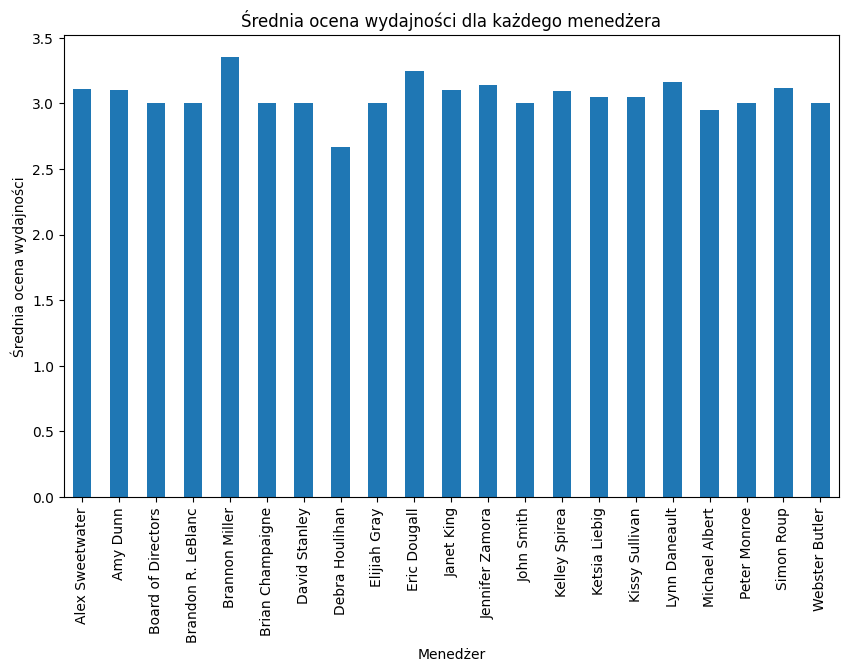

In [284]:
df.groupby('ManagerName')['PerformanceScoreNumeric'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Średnia ocena wydajności dla każdego menedżera')
plt.xlabel('Menedżer')
plt.ylabel('Średnia ocena wydajności')
plt.show()

Najwyższe średnie oceny:

Brannon Miller ma najwyższą średnią ocenę 3.35.

Najniższe średnie oceny:

Debra Houlihan ma najniższą średnią ocenę 2.67.

2. Najlepsze żródła pozyskania pracownika w aspekcie najdłuższego stażu pracowników

In [285]:
df['Tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['DateofHire'])).dt.days // 365


In [286]:
średni_staż = df.groupby('RecruitmentSource')['Tenure'].mean().sort_values(ascending=False)
print(średni_staż)


RecruitmentSource
Other                                     13.555556
Social Networks - Facebook Twitter etc    13.181818
Careerbuilder                             13.000000
Search Engine - Google Bing Yahoo         12.840000
Billboard                                 12.750000
Diversity Job Fair                        12.655172
Word of Mouth                             12.307692
Monster.com                               12.083333
Pay Per Click                             12.000000
On-line Web application                   12.000000
MBTA ads                                  11.705882
Internet Search                           11.500000
Newspager/Magazine                        11.500000
Glassdoor                                 11.500000
Pay Per Click - Google                    11.333333
Information Session                       11.250000
Website Banner Ads                        11.076923
Professional Society                      10.850000
On-campus Recruiting                      10.5

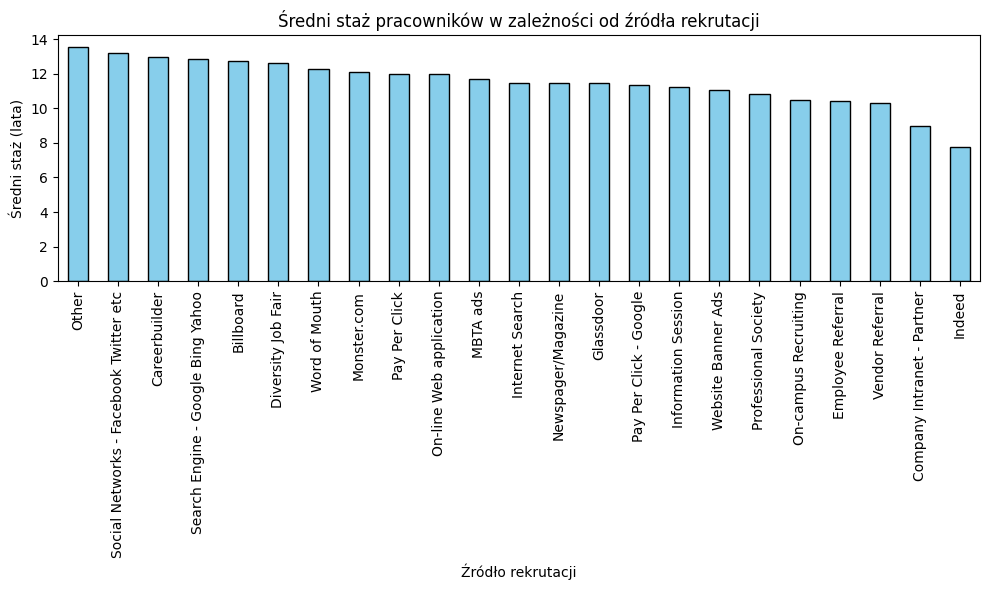

In [287]:
import matplotlib.pyplot as plt

średni_staż.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Średni staż pracowników w zależności od źródła rekrutacji')
plt.xlabel('Źródło rekrutacji')
plt.ylabel('Średni staż (lata)')
plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()
plt.show()

Firma powinna inwestować w rekrutację w mediach społecznościowych, z tych żródeł pracownicy mają najdłuższe staże 

3. Stan cywilnya zadowolenie z pracy

In [288]:
średnie_zadowolenie = df.groupby('MaritalDesc')['EmpSatisfaction'].mean().sort_values(ascending=False)
print(średnie_zadowolenie)


MaritalDesc
Widowed      4.250000
Divorced     4.033333
Single       3.970803
Separated    3.833333
Married      3.747967
Name: EmpSatisfaction, dtype: float64


In [289]:
from scipy.stats import f_oneway

grupy = [grupa['EmpSatisfaction'].dropna() for _, grupa in df.groupby('MaritalDesc')]
stat, p_value = f_oneway(*grupy)
print(f"F-statystyka: {stat}, p-wartość: {p_value}")


F-statystyka: 1.5381614759868525, p-wartość: 0.19098788812911788


In [290]:
from scipy.stats import pearsonr

df.loc[:, 'MaritalDescNumeric'] = df['MaritalDesc'].map({'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4})

korelacja, p_value = pearsonr(df['MaritalDescNumeric'], df['EmpSatisfaction'])
print(f"Korelacja: {korelacja}, p-wartość: {p_value}")


Korelacja: nan, p-wartość: nan


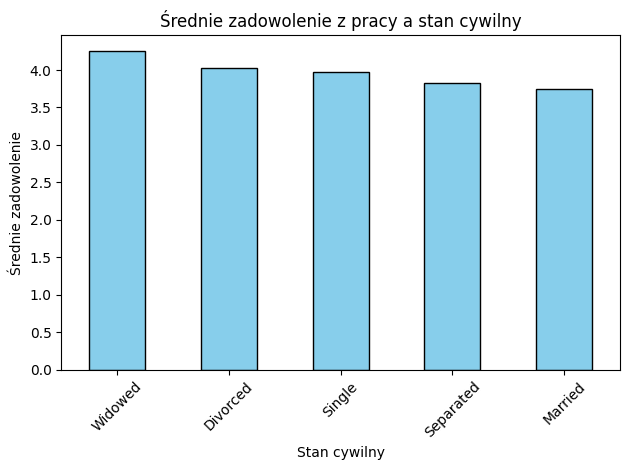

In [291]:
import matplotlib.pyplot as plt

średnie_zadowolenie.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Średnie zadowolenie z pracy a stan cywilny')
plt.xlabel('Stan cywilny')
plt.ylabel('Średnie zadowolenie')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



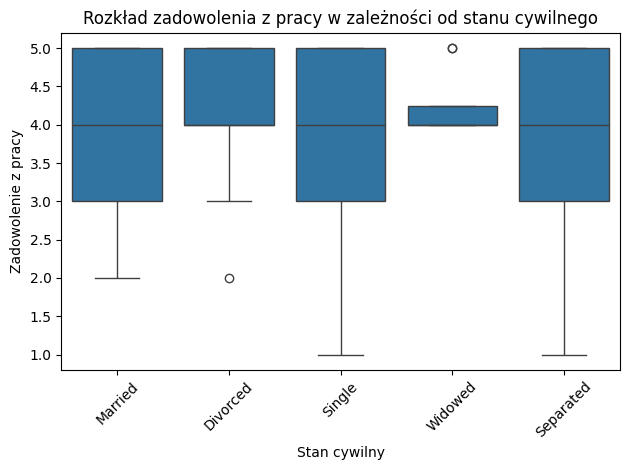

In [292]:
import seaborn as sns

sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df)
plt.title('Rozkład zadowolenia z pracy w zależności od stanu cywilnego')
plt.xlabel('Stan cywilny')
plt.ylabel('Zadowolenie z pracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Wyniki sugerują, że stan cywilny nie koreluje w sposób istotny z poziomem zadowolenia z pracy. 
Jednak najwięcej zadowolonych wdowców daje do myślenia

4. Struktura wieku aktualnie zatrudnionych pracowników

C:\Users\Gosia\AppData\Local\Temp\ipykernel_8548\3273933147.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aktywni_pracownicy['AgeGroup'] = pd.cut(aktywni_pracownicy['Age'], bins=bins, labels=labels)


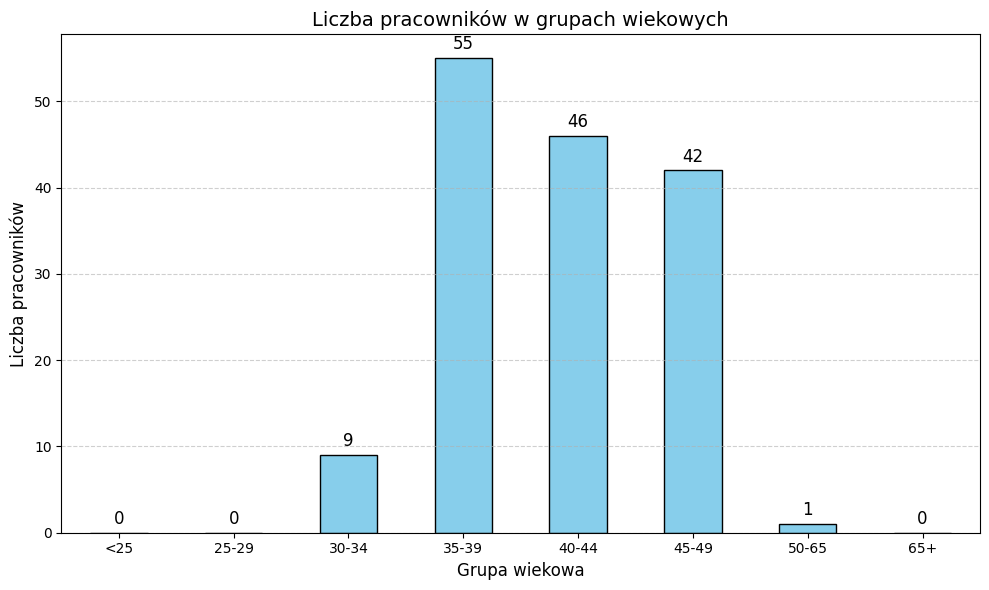

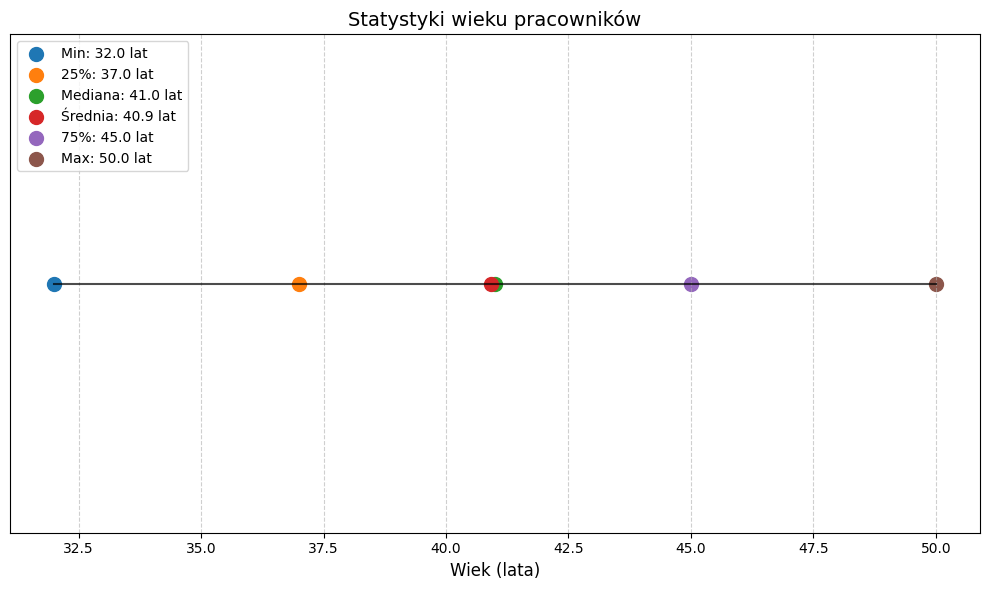

In [371]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df['DOB'] = pd.to_datetime(df['DOB'], format='%d/%m/%Y', errors='coerce')

today = datetime.today()
df['Age'] = (today - df['DOB']).dt.days // 365

aktywni_pracownicy = df[(df['DateofTermination'].isna()) & (df['Age'] >= 0)]

bins = [0, 24, 29, 34, 39, 44, 49, 65, 100]
labels = ['<25', '25-29', '30-34', '35-39', '40-44', '45-49', '50-65', '65+']
aktywni_pracownicy['AgeGroup'] = pd.cut(aktywni_pracownicy['Age'], bins=bins, labels=labels)

grupy_wiekowe = aktywni_pracownicy['AgeGroup'].value_counts().sort_index()

srednia_wieku = aktywni_pracownicy['Age'].mean()
mediana_wieku = aktywni_pracownicy['Age'].median()
min_wiek = aktywni_pracownicy['Age'].min()
max_wiek = aktywni_pracownicy['Age'].max()
odchylenie_std = aktywni_pracownicy['Age'].std()
percentyl_25 = aktywni_pracownicy['Age'].quantile(0.25)
percentyl_75 = aktywni_pracownicy['Age'].quantile(0.75)

plt.figure(figsize=(10, 6))
grupy_wiekowe.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Liczba pracowników w grupach wiekowych', fontsize=14)
plt.xlabel('Grupa wiekowa', fontsize=12)
plt.ylabel('Liczba pracowników', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(grupy_wiekowe):
    plt.text(i, v + 1, str(v), ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

statystyki_wiekowe = {
    "Min": min_wiek,
    "25%": percentyl_25,
    "Mediana": mediana_wieku,
    "Średnia": srednia_wieku,
    "75%": percentyl_75,
    "Max": max_wiek
}

for label, value in statystyki_wiekowe.items():
    plt.scatter(value, 1, label=f"{label}: {value:.1f} lat", s=100) 

plt.plot([min_wiek, max_wiek], [1, 1], color='black', linestyle='-', alpha=0.7)

plt.title('Statystyki wieku pracowników', fontsize=14)
plt.xlabel('Wiek (lata)', fontsize=12)
plt.yticks([]) 
plt.legend(loc='upper left', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Rozkład wieku
Średni wiek: Wynosi 40.92 lat, co oznacza, że zatrudnieni pracownicy są przeciętnie w średnim wieku.

Mediana (50%): Wynosi 41 lat, co wskazuje, że połowa pracowników ma mniej niż 41 lat, a druga połowa więcej.

Zatrudnienie skupia się na grupie wiekowej 37-45 lat

5. Specjalne projekty a wiek pracownika

In [373]:
# Przedziały wiekowe
bins = [0, 24, 29, 34, 39, 44, 49, 65, 100]  # Musi być o 1 więcej przedziałów niż etykiet
labels = ['<25', '25-29', '30-34', '35-39', '40-44', '45-49', '50-65', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Średnia liczba specjalnych projektów w grupach wiekowych
projekty_grupy_wiekowe = df.groupby('AgeGroup', observed=True)['SpecialProjectsCount'].mean()
print(projekty_grupy_wiekowe)




AgeGroup
30-34    0.000000
35-39    1.962500
40-44    1.114286
45-49    0.789474
50-65    0.000000
Name: SpecialProjectsCount, dtype: float64


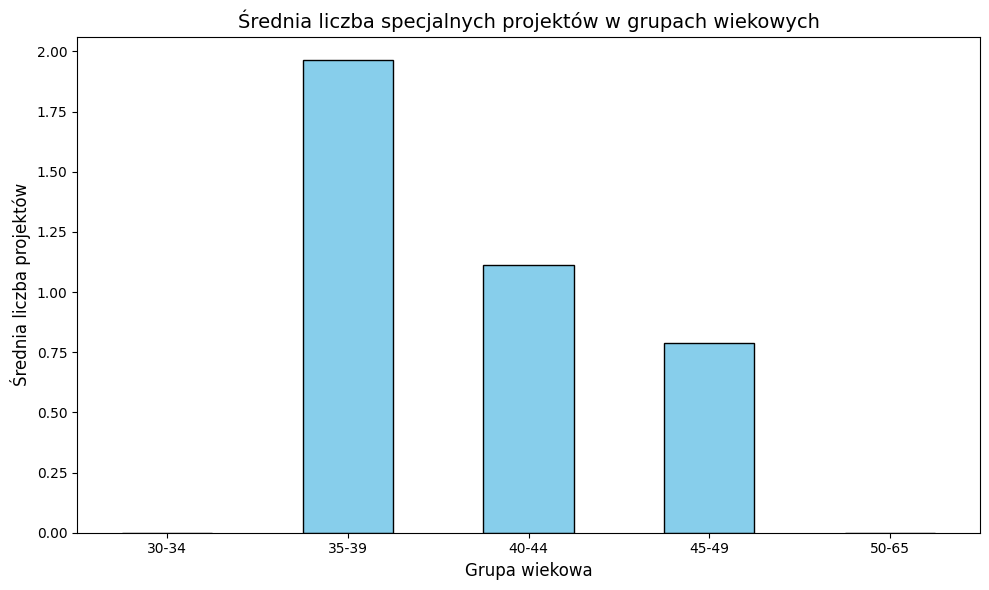

In [374]:
import matplotlib.pyplot as plt

projekty_grupy_wiekowe.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Średnia liczba specjalnych projektów w grupach wiekowych', fontsize=14)
plt.xlabel('Grupa wiekowa', fontsize=12)
plt.ylabel('Średnia liczba projektów', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [376]:
from scipy.stats import pearsonr

korelacja, p_value = pearsonr(df['Age'], df['SpecialProjectsCount'])
print(f"Korelacja: {korelacja}, p-wartość: {p_value}")


Korelacja: nan, p-wartość: nan


Grupy wiekowe pokazują średnią liczbę projektów specjalnych nad którymi pracują pracownicy. Można zaobserwować:

Grupa 35-39 ma najwyższą średnią liczbę projektów (1.96), co sugeruje, że pracownicy w tym przedziale wiekowym są najbardziej zaangażowani w specjalne projekty.

W grupach 40-44 i 45-49 średnia liczba projektów spada (odpowiednio 1.11 i 0.79), co może oznaczać, że zaangażowanie w projekty specjalne maleje wraz z wiekiem.

W grupach 30-34 i 50-65 średnia liczba projektów wynosi 0. To może sugerować, że młodsi i starsi pracownicy są mniej angażowani w takie projekty.

Jednak mimo wszystko wdowcy są najbardziej szczęśliwi, Przypadek? :)